In [68]:
# libraries

import sys
print("Python version: {}".format(sys.version))

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
print("Pandas version: {}".format(pd.__version__))
import numpy as np
print("Numpy version: {}".format(np.__version__))
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
print("Matplotlib version: {}".format(matplotlib.__version__))
import scipy
print("Scipy version: {}".format(scipy.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

# Modelling libraries
from sklearn.cross_validation import train_test_split , StratifiedKFold

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier

print('-'*25)
# check inside input directory for the files
!ls -lrth input

Python version: 3.6.2 |Anaconda, Inc.| (default, Sep 30 2017, 18:42:57) 
[GCC 7.2.0]
Pandas version: 0.23.4
Numpy version: 1.15.0
Matplotlib version: 2.2.3
Scipy version: 1.1.0
scikit-learn version: 0.19.2
-------------------------
total 92K
-rw-rw-r-- 1 aman aman  60K Apr  9 05:33 train.csv
-rw-rw-r-- 1 aman aman  28K Apr  9 05:33 test.csv
-rw-rw-r-- 1 aman aman 3.2K Apr  9 05:33 gender_submission.csv


In [3]:
# loading data

train_df = pd.read_csv("input/train.csv")
test_df = pd.read_csv("input/test.csv")

print("Train dataframe shape is: ", train_df.shape)
print("Test dataframe shape is: ", test_df.shape)

Train dataframe shape is:  (891, 12)
Test dataframe shape is:  (418, 11)


In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
print(train_df.info())
print('-'*30)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null obje

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print("total 'train_df' columns with null values:\n", train_df.isnull().sum())
print('-'*30)
print("total 'test_df' columns with null values:\n", test_df.isnull().sum())

total 'train_df' columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------
total 'test_df' columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [20]:
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [22]:
train_df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [23]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
full_df = train_df.append(test_df, ignore_index=True)
print('full_df shape:', full_df.shape)
print('train_df shape:', train_df.shape)
print('test_df shape:', test_df.shape)

full_df shape: (1309, 12)
train_df shape: (891, 12)
test_df shape: (418, 11)


In [10]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [12]:
full_df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


### categorical values

In [13]:
embarked_df = pd.get_dummies(full_df.Embarked, prefix='Embarked')
embarked_df.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [16]:
full_df['Sex'] = full_df['Sex'].map({'female': 0, 'male': 1})
full_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450


In [18]:
pclass_df = pd.get_dummies(full_df.Pclass, prefix='Pclass')
pclass_df.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


### missing values

In [25]:
# missing values in Age, Cabin, Embarked, Fare
imputer_df = pd.DataFrame()

imputer_df['Age'] = full_df.Age.fillna(value= full_df.Age.mean())
imputer_df['Fare'] = full_df.Fare.fillna(value= full_df.Fare.mean())

imputer_df.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


### feature engineering

In [45]:
#list(full_df.Cabin.value_counts().index)

In [32]:
cabin_df = pd.DataFrame()

# missing values as U (unknown)
cabin_df['cabin'] = full_df.Cabin.fillna('U')

# mapping each Cabin value with the cabin letter
cabin_df[ 'cabin' ] = cabin_df[ 'cabin' ].map( lambda c : c[0] )

# dummy encoding
cabin_df = pd.get_dummies(cabin_df['cabin'], prefix='cabin')

cabin_df.head()

,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [59]:
# extracting class info from tickets, for ticket numbers where there's no class mentioned putting xxx
def cleanTicket(ticket):
    ticket = ticket.replace( '.', '')
    ticket = ticket.replace( '/', '')
    ticket = ticket.split()
    ticket = map(lambda t: t.strip(), ticket)
    ticket = list(filter(lambda t: not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else:
        return 'XXX'

ticket_df = pd.DataFrame()

ticket_df['Ticket'] = full_df.Ticket.map(cleanTicket)

# dummy encoding from ticket-classes
ticket_df = pd.get_dummies(ticket_df['Ticket'], prefix='Ticket')
print(ticket_df.shape)
ticket_df.head()


(1309, 37)


,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
# extracting family size from the Parch and SibSp variabels
family_df = pd.DataFrame()

# extracting family size, including the passenger
family_df['FamilySize'] = full_df['Parch'] + full_df['SibSp'] + 1

# extracting family type based on the size, as: single, small family or big family
family_df['SingleFamily'] = family_df['FamilySize'].map(lambda f: 1 if f == 1 else 0)
family_df['SmallFamily'] = family_df['FamilySize'].map(lambda f: 1 if 2 <= f <= 4 else 0)
family_df['BigFamily'] = family_df['FamilySize'].map(lambda f: 1 if f >= 5 else 0)

family_df.head()

,FamilySize,SingleFamily,SmallFamily,BigFamily
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [57]:
full_df.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [62]:
# merging all dfs
# imputed , embarked , pclass , sex , family , cabin , ticket
full = pd.concat([imputer_df, embarked_df, pclass_df, full_df['Sex'], family_df, cabin_df, ticket_df], axis=1)

full.head()

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex,FamilySize,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,22.0,7.2500,0,0,1,0,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,38.0,71.2833,1,0,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,26.0,7.9250,0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,35.0,53.1000,0,0,1,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
4,35.0,8.0500,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


### creating datasets

In [67]:
X = full[0:891]
y = train_df['Survived']
X_test = full[891:]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=29)

print("\nfull: ", full.shape,"\nX_train: ", X_train.shape, "\ny_train: ", y_train.shape,
      "\nX_valid: ", X_valid.shape, "\ny_valid: ", y_valid.shape, "\nX_test: ", X_test.shape)


full:  (1309, 59) 
X_train:  (623, 59) 
y_train:  (623,) 
X_valid:  (268, 59) 
y_valid:  (268,) 
X_test:  (418, 59)


### feature importance

In [78]:
# selecting the optimal features is important in model building
tree = DecisionTreeClassifier(random_state=29)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=29,
            splitter='best')

In [79]:
imp = pd.DataFrame(tree.feature_importances_ , 
                   columns=['Importance'], 
                   index=X.columns)

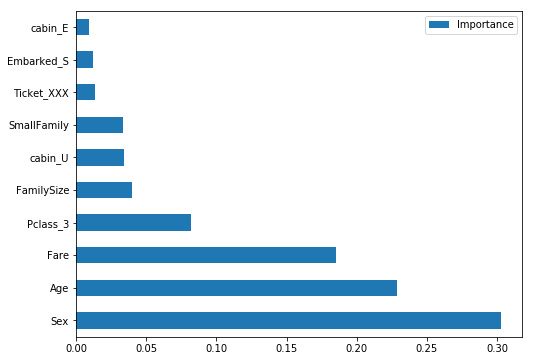

In [81]:
imp = imp.sort_values(['Importance'], ascending=False)
imp[ : 10 ].plot(kind = 'barh', figsize=(8, 6))

### modeling

In [ ]:
# model selection and training
